<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 수치 맞추기

## 1. 데이터 가져오기

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 2. 모델에 입력할 데이터 X 준비하기

In [ ]:
df_x = diabetes.data

print(df_x.shape)

(442, 10)


## 3. 모델에 예측할 데이터 y준비하기

In [ ]:
df_y = diabetes.target

print(df_y.shape)

(442,)


## 4. train, test데이터로 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=8)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


## 5. 모델 준비하기

In [ ]:
# feature의 갯수에 맞는 w, b 정하기
# 먼저 가중치 W, b를 임의로 설정해줌
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

[0.27630833 0.45728362 0.62605923 0.36964544 0.2561847  0.69207375
 0.41697863 0.8544111  0.22197887 0.61452574]
0.17237603590504746


In [ ]:
# model 준비하기
def model(X, W, b):
  prediction = 0
  for i in range(len(W)):
    prediction = prediction + X[:,i] * W[i]
  prediction = prediction + b
  return prediction
  


## 6. 손실함수 loss정의하기

In [ ]:
# 손실함수 MSE로 정의하기
# MSE함수 정의
def MSE(a, b):
  mse = ((a-b)**2).mean()
  return mse

#RMSE함수 정의
def RMSE(a, b):
  rmse = np.sqrt(((a-b)**2).mean())
  return rmse

def r2_square(y, y_pred):
  loss = sum((y-y_pred)**2) / sum((y-y.mean())**2)
  return loss


#손실함수 정의
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = RMSE(predictions, y) #손실
  return L

## 7. 기울기를 구하는 gradient 함수 구현하기

In [ ]:
def gradient(X, W, b, y):
  # 가중치 개수
  N = len(W)

  #y_pred 준비
  y_pred = model(X, W, b)

  #dw 계산
  dw = 1/N * 2 * X.T.dot(y_pred - y)

  #db 계산
  db = (2 * (y_pred - y)).mean()

  return dw, db


## 8. 학습률 설정하기

In [ ]:
learning_rate = 0.01


## 9. 모델 학습하기

In [ ]:
losses = []

for i in range(1, 1001):
  dw, db = gradient(X_train, W, b, y_train)
  W -= learning_rate*dw
  b -= learning_rate*db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10 == 0 :
    print('Iteration %d : Loss %.4f' %(i, L))

Iteration 10 : Loss 144.9673
Iteration 20 : Loss 125.2670
Iteration 30 : Loss 109.9426
Iteration 40 : Loss 98.1611
Iteration 50 : Loss 89.2058
Iteration 60 : Loss 82.4637
Iteration 70 : Loss 77.4196
Iteration 80 : Loss 73.6525
Iteration 90 : Loss 70.8294
Iteration 100 : Loss 68.6949
Iteration 110 : Loss 67.0585
Iteration 120 : Loss 65.7811
Iteration 130 : Loss 64.7631
Iteration 140 : Loss 63.9334
Iteration 150 : Loss 63.2419
Iteration 160 : Loss 62.6534
Iteration 170 : Loss 62.1429
Iteration 180 : Loss 61.6927
Iteration 190 : Loss 61.2900
Iteration 200 : Loss 60.9258
Iteration 210 : Loss 60.5932
Iteration 220 : Loss 60.2872
Iteration 230 : Loss 60.0039
Iteration 240 : Loss 59.7403
Iteration 250 : Loss 59.4940
Iteration 260 : Loss 59.2631
Iteration 270 : Loss 59.0461
Iteration 280 : Loss 58.8415
Iteration 290 : Loss 58.6483
Iteration 300 : Loss 58.4654
Iteration 310 : Loss 58.2920
Iteration 320 : Loss 58.1274
Iteration 330 : Loss 57.9708
Iteration 340 : Loss 57.8217
Iteration 350 : Loss

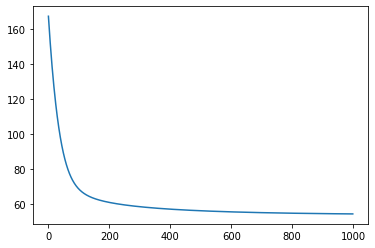

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
W, b, dw, db

(array([  19.45032924, -175.24861659,  455.74650396,  317.09164048,
         -57.97048302,  -95.63191118, -212.8303758 ,  129.09796372,
         338.84744904,  166.02913904]),
 152.07224460407025,
 array([  2.8304882 ,  12.33484542, -12.84279978,  -7.22973172,
          6.66274222,   7.16924062,   3.08068701,   0.85858048,
         -8.14327741,   2.86429551]),
 0.0039148079141195224)

## 10. test데이터에 대한 성능 확인하기

In [ ]:
#test 데이터에 대학 예측값의 손실이 얼마나 큰지 측정
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

53.766467708478395

## 11. 정답 데이터와 예측한 데이터 시각화 하기

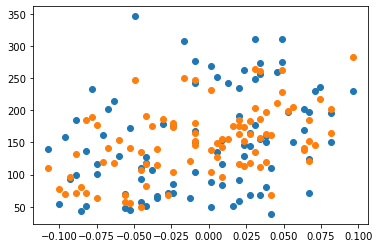

In [ ]:
plt.scatter(X_test[:,0], y_test)  #X_test[:,0] -> 모든 행에 대해서 나이부분 값
plt.scatter(X_test[:,0], prediction)
plt.show()

# 자전거 타는 사람 수 예측

## 1. 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np

data_path = '/content/drive/MyDrive/캐글_필사/.kaggle/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. datatime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초 6개의 칼럼 생성하기

In [ ]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0]) 

train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기




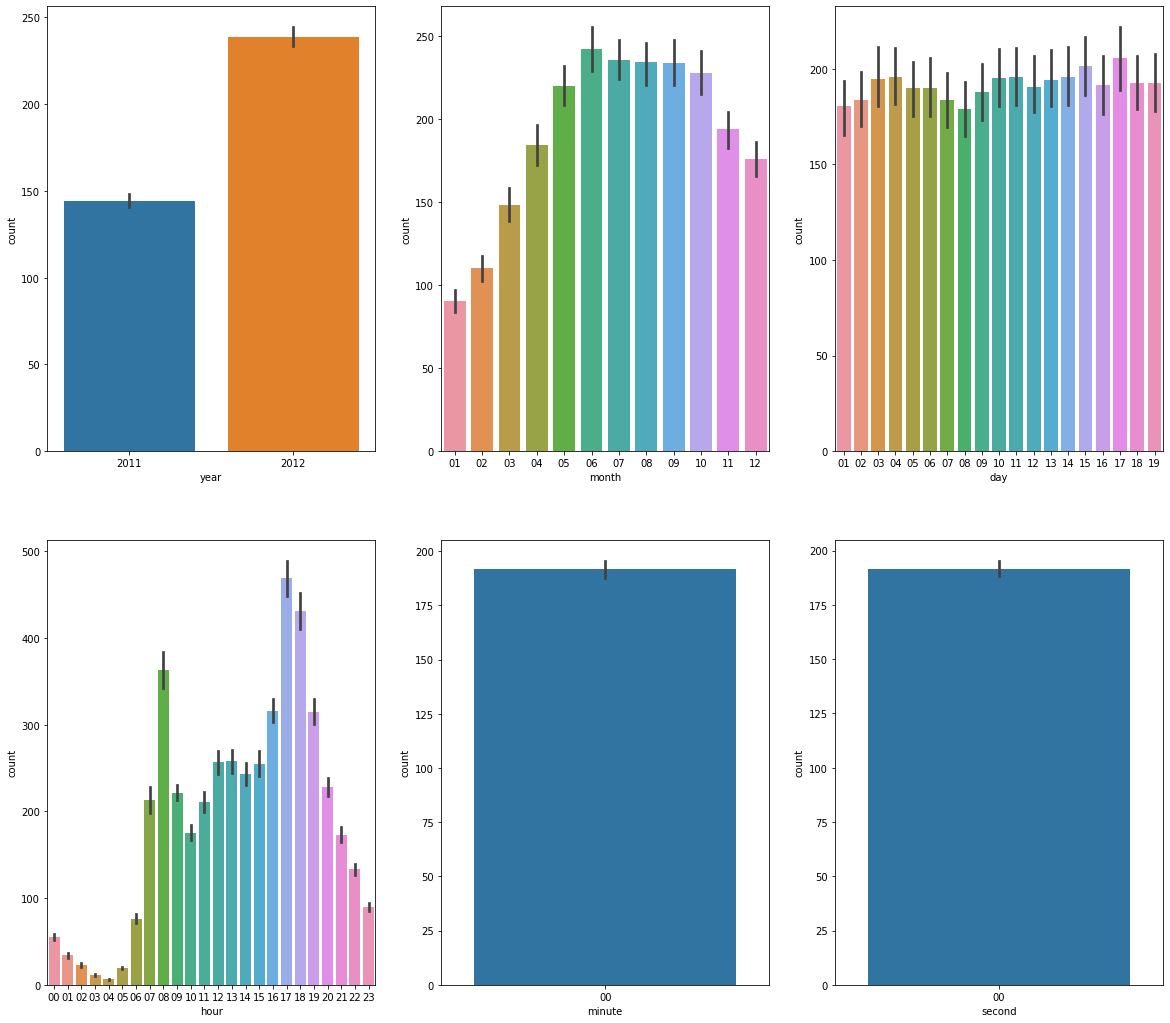

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

%matplotlib inline

f, ax = plt.subplots(2, 3, figsize = (20, 18))
sns.barplot(x=train['year'], y=train['count'], ax=ax[0,0])
sns.barplot(x=train['month'], y=train['count'], ax=ax[0,1])
sns.barplot(x=train['day'], y=train['count'], ax=ax[0,2])
sns.barplot(x=train['hour'], y=train['count'], ax=ax[1,0])
sns.barplot(x=train['minute'], y=train['count'], ax=ax[1,1])
sns.barplot(x=train['second'], y=train['count'], ax=ax[1,2])

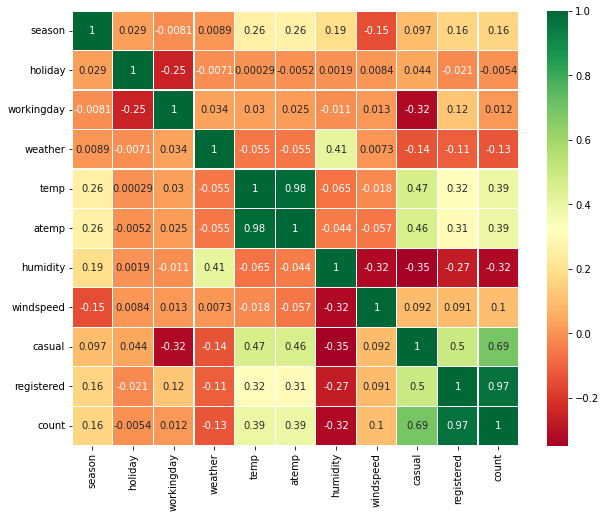

In [ ]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- temp와 atemp의 상관관계가 0.98이라 두 데이터 모두는 필요 없어보임
- temp나 atemp만 써도 될 것 같다.

In [ ]:
#temp 구간나누기
train['temp_band'] = pd.qcut(train['temp'], 4)
train.groupby(['temp_band'])['count'].mean().to_frame().style.background_gradient(cmap='summer_r')

,count
temp_band,
"(0.819, 13.94]",103.200615
"(13.94, 20.5]",172.143595
"(20.5, 26.24]",216.393254
"(26.24, 41.0]",284.861469


- 머신러닝에 좀 더 편리하게 하기 위해 continous value인 temp를 categorical value로 변환해줌



In [ ]:
train['temp_cat'] = 0
train.loc[train['temp']<=13.94, 'temp_cat'] = 0
train.loc[(train['temp']>13.94)&(train['temp']<=20.5), 'temp_cat'] = 1
train.loc[(train['temp']>20.5)&(train['temp']<=26.24), 'temp_cat'] = 2
train.loc[(train['temp']>26.24)&(train['temp']<=41.0), 'temp_cat'] = 3

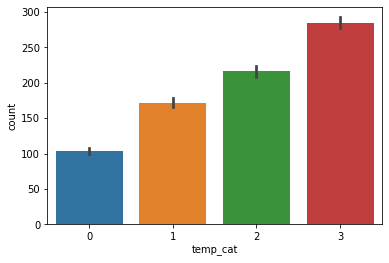

In [ ]:
sns.barplot(x=train['temp_cat'], y=train['count'])
plt.show()

temp_cat이 커지며 count가 커지므로 학습에 쓸만한 데이터인것같다.

- 필요없는 피처 없애기

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,year,month,day,hour,minute,second,temp_band,temp_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2011-01-01,2011,01,01,00,00,00,"(0.819, 13.94]",0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,2011-01-01,2011,01,01,01,00,00,"(0.819, 13.94]",0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,32,2011-01-01,2011,01,01,02,00,00,"(0.819, 13.94]",0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,13,2011-01-01,2011,01,01,03,00,00,"(0.819, 13.94]",0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2011-01-01,2011,01,01,04,00,00,"(0.819, 13.94]",0


In [ ]:
train = train[train['weather']!=4]  #weather 값이 4가 아닌것들만 가져옴

In [ ]:
drop_features = ['casual', 'atemp', 'datetime', 'date', 'windspeed', 'month', 'temp_band', 'registered']
train = train.drop(drop_features, axis=1)

- test 데이터에 대해서도 temp 값들을 카테고리화 시켜줌

In [ ]:
test['temp_cat'] = 0
test.loc[test['temp']<=13.94, 'temp_cat'] = 0
test.loc[(test['temp']>13.94)&(test['temp']<=20.5), 'temp_cat'] = 1
test.loc[(test['temp']>20.5)&(test['temp']<=26.24), 'temp_cat'] = 2
test.loc[(test['temp']>26.24)&(test['temp']<=41.0), 'temp_cat'] = 3

In [ ]:
test['date'] = test['datetime'].apply(lambda x : x.split()[0])

test['year'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[2])
test['hour'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[0])
test['minute'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[1])
test['second'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[2])

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,temp_cat,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,2011-01-20,2011,01,20,02,00,00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,2011-01-20,2011,01,20,03,00,00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,2011-01-20,2011,01,20,04,00,00


In [ ]:
drop_features = ['atemp', 'datetime', 'date', 'windspeed', 'month']
test = test.drop(drop_features, axis=1)

## 4. x, y컬럼 선택과 train/test 데이터 분리

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data
# train, test data set 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y=train['count'] #타깃값

## 5. LinearRegression 모델 학습

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y)
y_pred = model.predict(X_train)

In [ ]:
X_train.shape, y.shape, X_test.shape

((10885, 12), (10885,), (6493, 12))

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [ ]:
#평가지표 계산 함수 정의
def r2_square(y, y_pred):
  loss = sum((y-y_pred)**2) / sum((y-y.mean())**2)
  return loss

def mse(y, y_pred):
  
  loss = np.mean((y-y_pred)**2)
  return loss

def rmse(y, y_pred):
  loss = np.sqrt(mse(y, y_pred))
  return loss

In [ ]:
print(f'선형회귀의 r2_square값 : {r2_square(y, y_pred):.4f}')
print(f'선형회귀의 mse값 : {mse(y, y_pred):.4f}')
print(f'선형회귀의 rmse값 : {rmse(y, y_pred):.4f}')

선형회귀의 r2_square값 : 0.6137
선형회귀의 mse값 : 20137.3749
선형회귀의 rmse값 : 141.9062


## 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y)
y_pred_2 = model.predict(X_test)

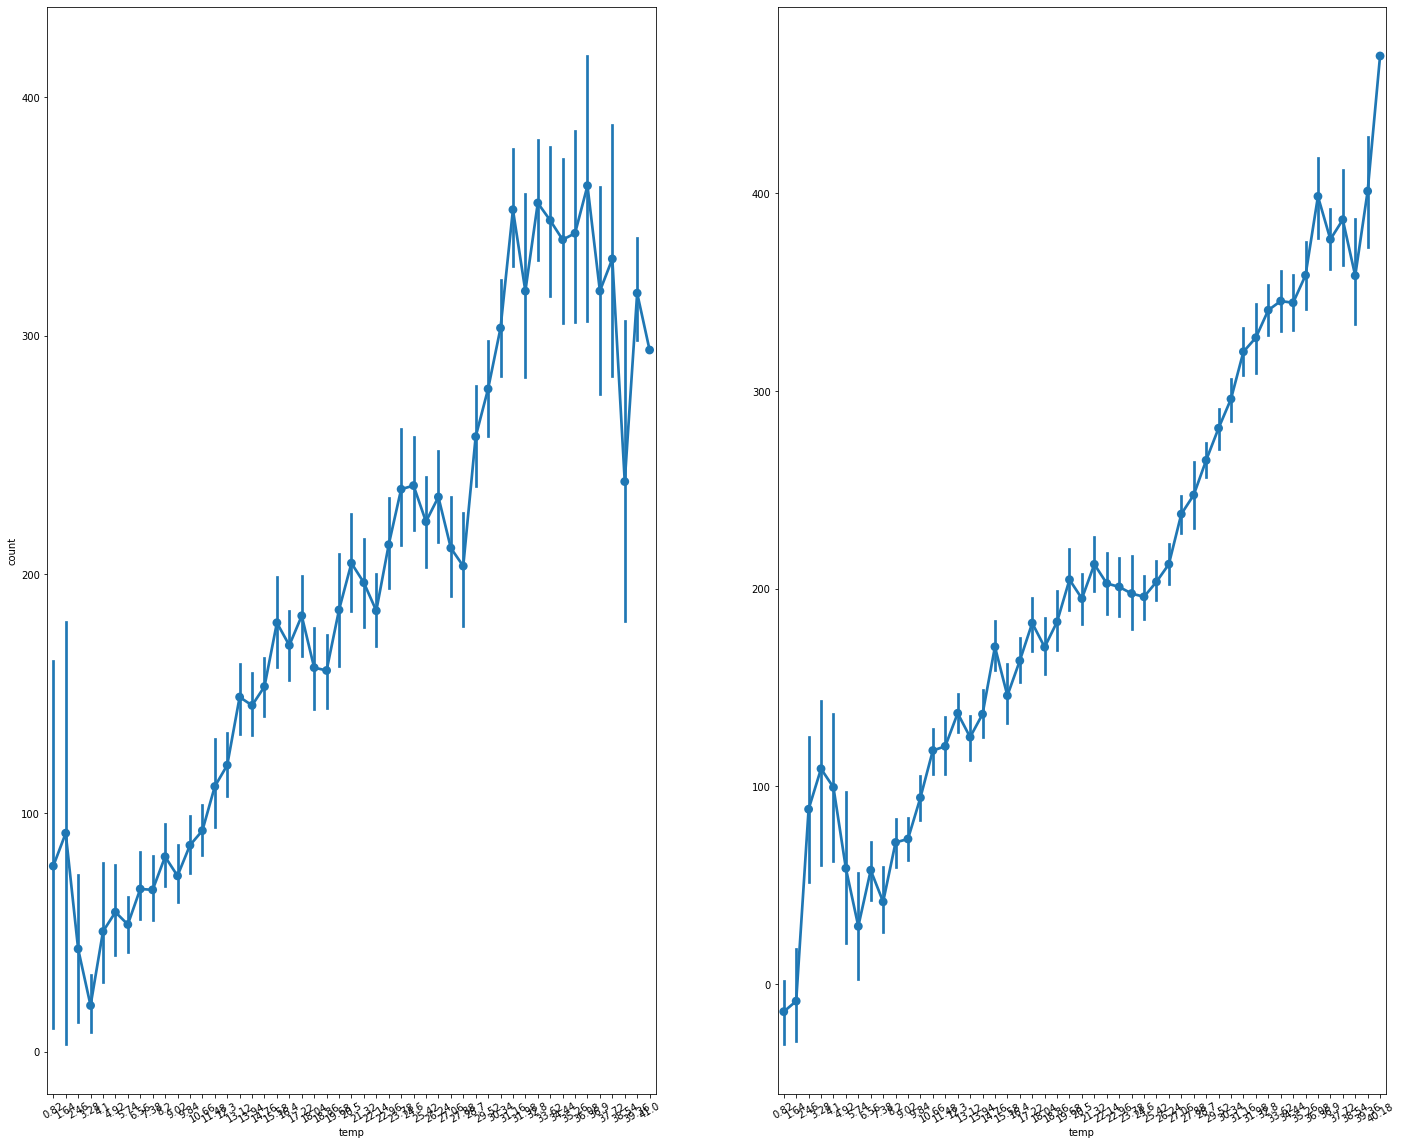

In [ ]:

f, ax = plt.subplots(1,2, figsize=(24,20))
point1 = sns.pointplot(x='temp', y= y, data=train, ax=ax[0]) 
point2 = sns.pointplot(x='temp', y= y_pred_2, data=test, ax=ax[1]) 
ax[0].tick_params('x', labelrotation=30)
ax[1].tick_params('x', labelrotation=30)



# 회고

1. 당뇨병 수치 예측
  - 손실 함수를 정의할 때 처음엔 MSE함수로 정의했다. 그러고 loss값 계산했을 때 2800? 정도로 너무 높게 나오길래 이게 맞나...? 싶었다. 이건 뭔가 잘못됐다는 생각에 손실 함수를 RMSE로 하고 loss값을 구해주니까 50대가 나왔다. 아마 애초에 train데이터의 값들이 이리저리 흩어져 있어서 선형 회귀로는 손실이 높아질 수 밖에 없는 것 같다.
  - 그리고 손실함수를 거의 대부분 MSE, RMSE, RMSLE를 사용하길래 왜 R-squared는 사용을 안하지?? 라는 생각이 들어서 R-squared함수를 직접 편미분해서 구한 dw, db를 이용해 예측과 그래프를 그려보려고 했는데... 일단 loss값이 음수가 나오고 db.shape가 (353,)가 나와버리는 기현상이 생겨서 포기했다..어디서 부터 잘못된건지는 모르겠지만, 일단 지금은 넘어가고 나중에 방법이 생각나면 다시 돌아와서 해결해봐야겠다.

2. 자전거 타는 사람 수 예측
  - 보통 지금까지 LMS나 캐글 필사에서 하던 titanic관련 캐글에서는 모델 학습을 위한 X_train, X_test 등을 나눌 때, sklearn의 train_test_split을 이용해해서 처음엔 그렇게 해봤다. 그랬더니 마지막 시각화 부분에서 y축 부분의 값이 count값이 나오는게 아니라 이상한 -16435 뭐 이런 값이 나와서 또 이건 아니다 싶어 train과 test를 합치고 거기서 다시 X_train과 X_test를 나누는 방법을 사용했더니 y축 값이 바르게 나왔다. 근데 또 신기한건 y값이 -16435 이렇게 나올때랑 그 뒤랑 그래프 모양은 똑같다는 거다....
  - 이번에도 손실 함수를 MSE, RMSE 뿐 아니라 R-squared함수를 이용하여 loss값을 구했다..R-squared에 미련이 남은 것 같다.
  
  - 그리고 아랫부분은 캐글 필사하면서 성능 향상하는 부분이었는데 위의 내용을 다 지우기가 아깝기도 해서 밑에 이어 붙이겠습니다... 양이 너무 많아 질 것 같긴 하지만...ㅎㅎ